In [61]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [62]:
df = pd.read_csv(r"C:\Users\jsrei\OneDrive\Desktop\Data Science\midterm_data.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [64]:
df.describe(include = 'all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [65]:
df.head(10)

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
5,6,57,9,36.061679,9,16,195.40,1,Desktop,Location 5
6,7,27,2,6.259057,1,14,116.28,0,Mobile,Location 2
7,8,37,8,28.509460,7,16,118.14,1,Desktop,Location 1
8,9,39,5,21.073814,7,25,175.00,0,Tablet,Location 1
9,10,54,5,28.689260,6,22,196.29,0,Desktop,Location 2


Checking for and removing outliers

<Axes: >

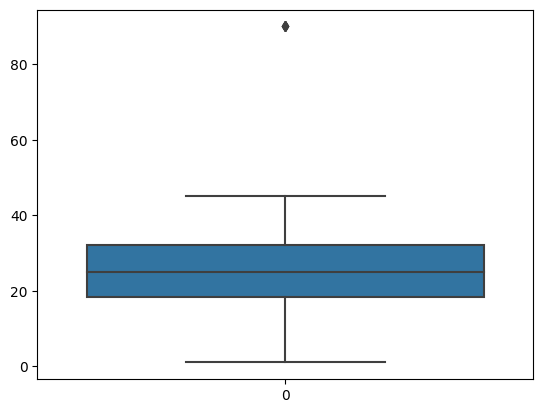

In [66]:
sns.boxplot(df['time_spent'])

In [67]:
df[df['time_spent'] > 80]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
284,285,47,5,90.0,12,14,148.45,0,Desktop,Location 4
2494,2495,28,2,90.0,12,18,151.35,0,Desktop,Location 1
2833,2834,30,8,90.0,12,7,88.32,0,Desktop,Location 1
3957,3958,19,1,90.0,12,20,228.70,0,Desktop,Location 4


In [68]:
df.drop(284, axis=0, inplace=True)
df.drop(2494, axis=0, inplace=True)
df.drop(2833, axis=0, inplace=True)
df.drop(3957, axis=0, inplace=True)

In [69]:
df2 = df.copy()

I attempted to drop the duplicate values however when looking at the df.info function before and after the drop, there are no changes

In [70]:
df2.drop_duplicates(inplace = True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4996 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4996 non-null   int64  
 1   age              4996 non-null   int64  
 2   sessions         4996 non-null   int64  
 3   time_spent       4996 non-null   float64
 4   pages_visited    4996 non-null   int64  
 5   cart_items       4996 non-null   int64  
 6   cart_value       4996 non-null   float64
 7   checkout_status  4996 non-null   int64  
 8   device           4896 non-null   object 
 9   location         4966 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.3+ KB


In [72]:
df[df['device'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
79,80,38,8,16.074280,1,8,69.84,0,NaN,Location 4
136,137,61,1,25.418891,6,20,140.39,1,NaN,Location 4
249,250,21,1,5.000000,1,5,41.39,0,NaN,Location 1
287,288,35,3,27.292828,6,23,236.13,0,NaN,Location 4
290,291,20,2,37.307904,9,15,157.54,1,NaN,Location 1
...,...,...,...,...,...,...,...,...,...,...
4686,4687,35,5,45.000000,10,6,88.63,0,NaN,Location 4
4689,4690,29,2,8.648351,2,13,125.84,0,NaN,Location 5
4763,4764,55,1,35.940041,6,18,211.00,1,NaN,Location 4
4802,4803,19,9,15.044741,3,24,283.49,0,NaN,Location 4


I chose to remove all of the columns with null values to be able to analyze the device and location variables effectively

In [73]:
df2 = df2.dropna()

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4867 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4867 non-null   int64  
 1   age              4867 non-null   int64  
 2   sessions         4867 non-null   int64  
 3   time_spent       4867 non-null   float64
 4   pages_visited    4867 non-null   int64  
 5   cart_items       4867 non-null   int64  
 6   cart_value       4867 non-null   float64
 7   checkout_status  4867 non-null   int64  
 8   device           4867 non-null   object 
 9   location         4867 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 418.3+ KB


In [94]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4896,4966
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2534,1054
mean,2500.586069,41.546637,5.028022,25.106582,5.769416,14.966573,149.439333,0.272618,NaN,NaN
std,1443.602588,14.042265,2.594677,9.656546,2.565825,6.047119,68.724594,0.445351,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.263008,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.026358,6.000000,15.000000,143.290000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,31.981057,8.000000,20.000000,198.380000,1.000000,NaN,NaN


Checking to see if there is a significance difference in the mean of different variables and their impact on the checkout status

<Axes: xlabel='checkout_status', ylabel='time_spent'>

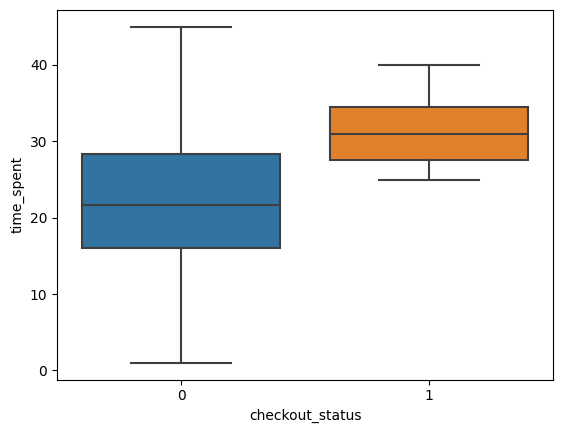

In [77]:
sns.boxplot(data = df2, x ='checkout_status', y = 'time_spent')

The mean time spent is significantly higher for people who ended up checking out 

<Axes: xlabel='checkout_status', ylabel='pages_visited'>

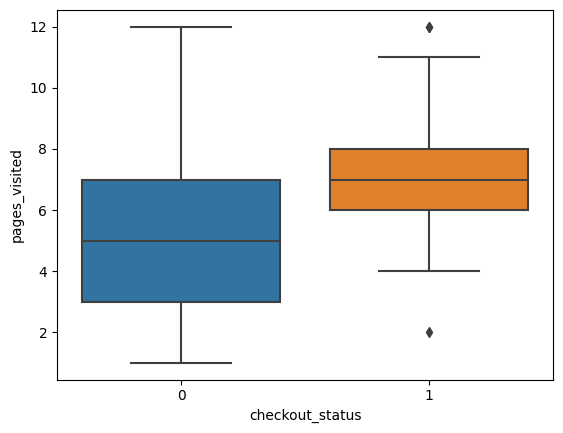

In [78]:
sns.boxplot(data = df2, x ='checkout_status', y = 'pages_visited')

The mean pages visitied is significantly higher for people who ended up checking out

<Axes: xlabel='device', ylabel='checkout_status'>

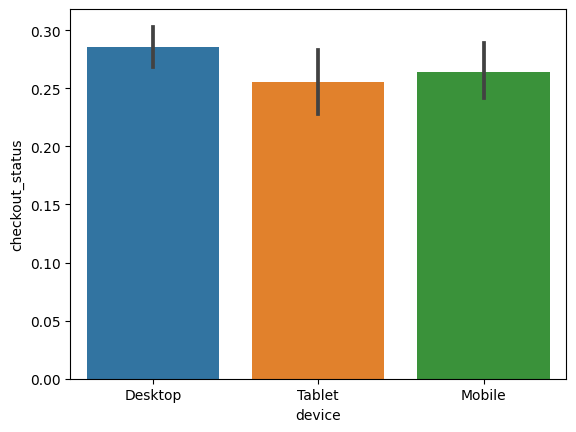

In [89]:
sns.barplot(data = df2, x = 'device', y = 'checkout_status', estimator = np.mean)

Desktops yield the highest average number of people checking out where mobile devices are second and tablet devices fall decently behind

<Axes: xlabel='location', ylabel='checkout_status'>

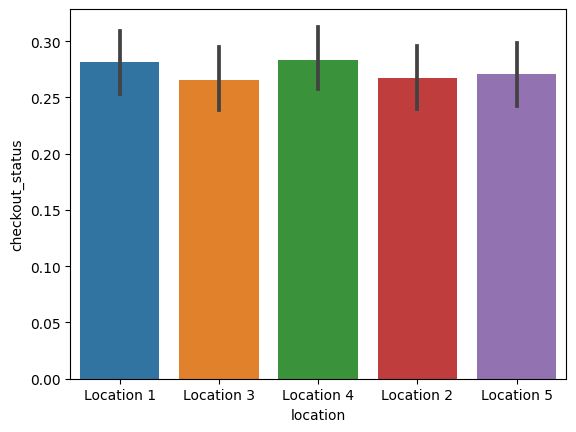

In [90]:
sns.barplot(data = df2, x = 'location', y = 'checkout_status', estimator = np.mean)

the average amount of check outs per location is fairly consistent. However, it is clear that location 1 and 4 are yielding the best results where lcoation 2,3,and 5 fall a litle behind

<Axes: xlabel='cart_items', ylabel='checkout_status'>

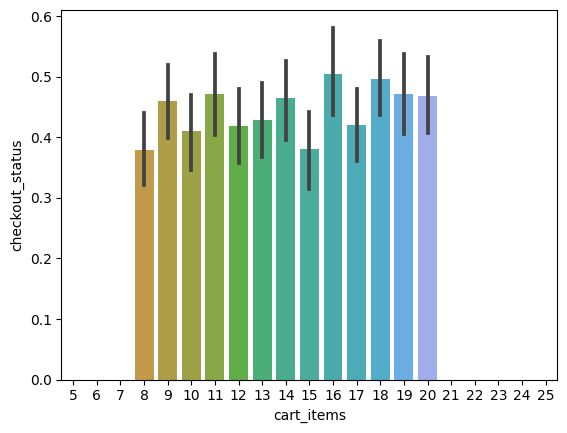

In [91]:
sns.barplot(data = df2, x = 'cart_items', y = 'checkout_status', estimator = np.mean)

the number of items does not seem to have a large impact on the checkout status

<Axes: xlabel='pages_visited', ylabel='checkout_status'>

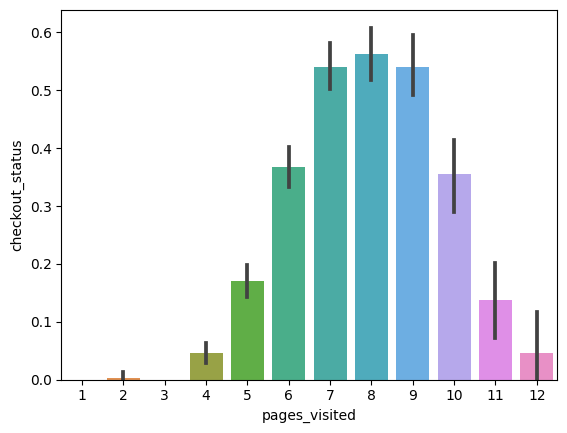

In [92]:
sns.barplot(data = df2, x = 'pages_visited', y = 'checkout_status', estimator = np.mean)

There seems to be an optimal number of pages visited of 8. 7 and 9 are not too bad but anything more and anything less experiences a large drop off in the average checkout rate.

I decided to create buckets and assign all of the time spent vatriables into each of the buckets. I created four buckets for 0-10 minutes spent, 10-20, 20-30, and 30+

In [103]:
def total_time_spent(x):
    if x >= 0 and x < 10:
        return '0-10'
    elif x >= 10 and x < 20:
        return '10-20'
    elif x >= 20 and x < 30:
        return '20-30'
    else:
        return '30+'

I then applied this column to the overall table to be able to use it in graphing

In [104]:
df2['time_spent_range'] = df2['time_spent'].apply(total_time_spent)

In [105]:
df2.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,time_spent_range
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,10-20
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,20-30
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,10-20
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,20-30
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,20-30


<Axes: xlabel='time_spent_range', ylabel='checkout_status'>

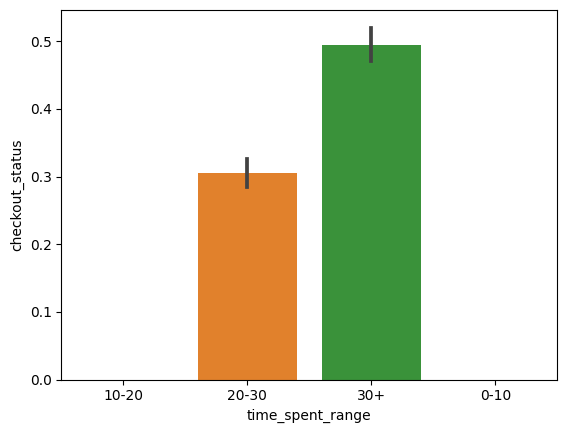

In [106]:
sns.barplot(data = df2, x = 'time_spent_range', y = 'checkout_status', estimator = np.mean)

This graph shows that no one that spends less than 20 minutes on the website ends up checking out. Only people that spend over 20 minutes begin to checkout and actually convert the site visits into checkouts.

ANSWERS TO THE QUESTIONS

1) Based on your analysis, what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?

People that end up checking out have three main attributes in common. The first being the time spent on the website. Secondly, the amount of pages visitied. Finally, the device they are using to purchase the items. 

People that end up completing the checkout process generally spend over 20 minutes on the site. Through the analysis it is shown that no one that spends less than 20 minutes on the website ends up making a purchase. The time spend before making a purchase could be seen as a sunk cost to consumers and when they realize they have spent more than 20 minutes they feel obligated to buy from the site to get something out of their time. 

The amount of pages visited also has a large impact on the purchase conversion rate. There seems to be an optimal amount of pages visited around 8. 7 and 9 pages visited also experience fairly good check out completion. However, when the number of pages visited is below 7 or above 9, the check out rate drops extremely fast. 

When comparing the devices that consumers can use to purchase the products, the desktop has the highest check out rate. Phone falls a bit behind desktop and tablet has the worst check out rate. People using desktops seems more invested in the purchase they are making and seem more serious about actually completing the purchase, where people on more mobile devices may just be taking a look, browsing, or showing friends items. 

2) How did you prepare your data for analysis? Describe your data cleaning and preparation approaches, and why these were the best choices.

I began by checking for any outliers in the data. I found there were four values in the time spent column that were much higher than any of the other values, double to be exact, so I decided to remove them as I saw them as significant outliers. I then looked to drop duplicates in the data to clean it and make sure there were no double entries, however, there were no duplicates within the dataset. Next, I looked to remove all the NULL values from the dataset. There were null values in the device and location columns. Since these are categorical variables, I decided it was wrong to assign them to other categories randomly and chose to remove them in my data cleaning process. Lastly, I decided to clean up the time_spent column by assigning them to separate bins to make them more accessible in the analysis process. I assigned all of the time spent values into four separate bins; 0-10, 10-20, 20-30, and 30+. This allowed me to use them in the graphing process more effectively.

3) What recommendations do you have for the product team? What should they do next? Be specific (i.e., who should they target, why and how).

There are three main recomendations I have for the marketing team. They include, attempting to increase the time spent on the website, attempting to keep the buying process to around 8 pages, and attempting to increase the customer conversion rate of mobile devices.

The first recommendation, increasing the time spent, can be achieved through updating the web pages to make them more interesting. This can include adding extra pictures to the product sites along with videos to keep the customer engaged. This can also include easy access to other products on the site to keep them on. For example if a customer is looking at a type of nail polish that they might not like, put links to other polishes on the side so they have a higher chance of finding something they do like and end up spending more time looking. 

The second recommendation involves ensuring the buying process is as close to 8 pages as possible. Consumers seem to checkout around their 8th page. If they go past 8 or are below it, the average amount of people that check out drops. Therefore the marketing team should look to ensure customers are able to gain all of the information required to complete their purchase by the 8th page. This could be through a recommended products section that should get the customer to where they want to be by 8 pages. The company could also look to convert more people that look at more pages. People that just randomly flip through pages are clearly interested in the products but don't have a good reason to buy. Advertisements for products sales or discount bundles can be shown to people that are looking at their 9th or later page. These people that just browse may then feel this is their time to purchase and the possibility of converting them to a checkout increases.

The final recommendation includes improving the checkout rate of people on their mobile devices. The website may not be optimized and marketing should look to ensure the website is similar to the desktop version. The mobile devices may not see other products as well due to the smaller screen and could miss products that would push them to purchase. A redesign of the mobile site could be needed. Another explanation is that people on their mobile phone are just looking at the site in passing and are not as invested. Getting mobile phone users to log onto their desktops and become invested could be an important step in the process. Possible offering deals if the customer was to access the site from their desktop could be an option. Getting mobile users onto their computer looking at the site makes them more engaged and will increase the checkout rate. 